In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import folium as fl
import time

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reload the data and apply preprocessing steps again

# Load the data
file_path = "https://raw.githubusercontent.com/diogo-costa-silva/datasets/main/fifa23_players_2023-08-25.csv"
players = pd.read_csv(file_path)

# Apply the preprocessing steps

# Rename the columns
columns_to_rename = {
    "Pace / Diving": "Pace_Diving",
    "Shooting / Handling": "Shooting_Handling",
    "Passing / Kicking": "Passing_Kicking",
    "Dribbling / Reflexes": "Dribbling_Reflexes",
    "Defense / Speed": "Defense_Speed",
    "Physical / Positioning": "Physical_Positioning"
}
players.rename(columns=columns_to_rename, inplace=True)

# Convert Pace_Diving to integer
players['Pace_Diving'] = players['Pace_Diving'].astype(int)

# Convert Price_Variation to numeric
players["Price_Variation"] = players["Price_Variation"].str.replace('%', '').astype(float)

# Split the Height column
players['Height_cm'] = players['Height'].str.split('|').str[0].str.strip().str.rstrip('cm').astype(int)
players['Height_ft'] = players['Height'].str.split('|').str[1].str.strip()

# Extract weight from BodyType and create a new column
players['Weight_kg'] = players['BodyType'].str.extract(r'(\d+)kg').astype(float)

# Clean up the BodyType column
players['BodyType'] = players['BodyType'].str.split(' ').str[0]
non_relevant_values = ["CR7", "Messi", "Neymar", "R9", "Shaqiri", "Courtois"]
players.loc[players['BodyType'].isin(non_relevant_values), 'BodyType'] = 'Unique'

# Impute missing values in "Weight_kg" column with median
median_weight = players["Weight_kg"].median()
players["Weight_kg"].fillna(median_weight, inplace=True)

# Impute weight values of 0 kg with the median weight
players.loc[players["Weight_kg"] == 0, "Weight_kg"] = median_weight

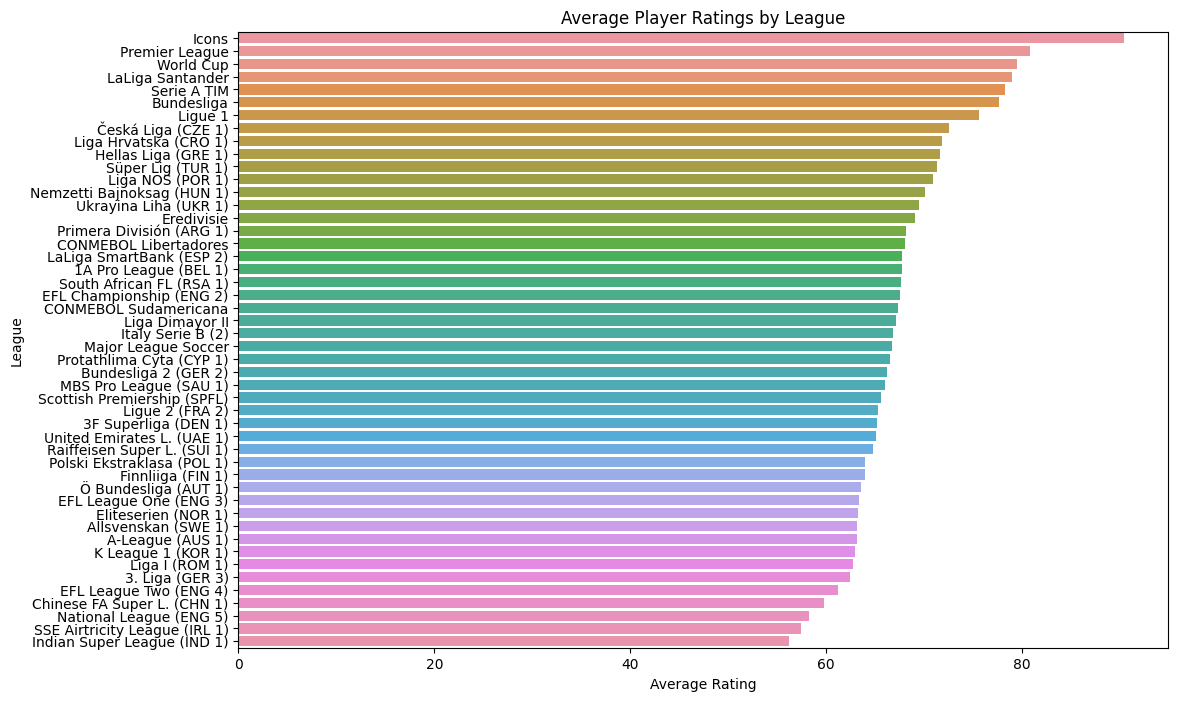

In [3]:
# Now create the bar plot of average player ratings by league
plt.figure(figsize=(12, 8))
avg_ratings_by_league = players.groupby('League')['Rating'].mean().sort_values(ascending=False)
sns.barplot(x=avg_ratings_by_league.values, y=avg_ratings_by_league.index)
plt.title('Average Player Ratings by League')
plt.xlabel('Average Rating')
plt.ylabel('League')
plt.show()

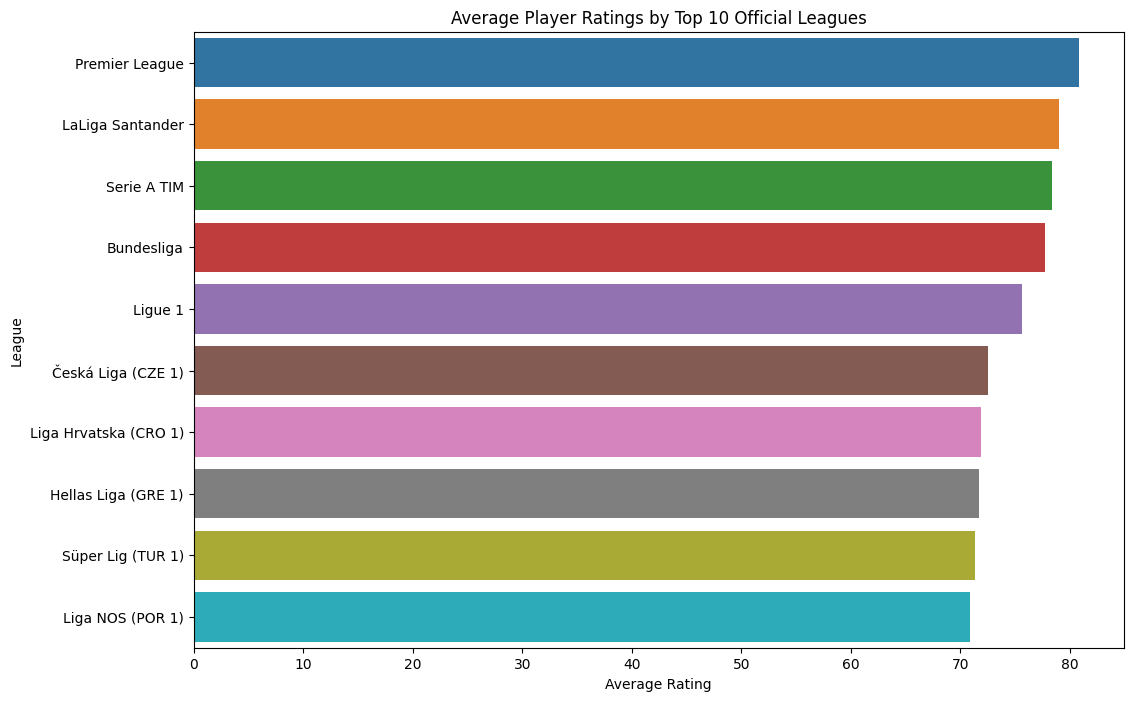

In [4]:
# Filter out the "Icons" and "World Cup" leagues and select only the top 10 official leagues
top_leagues = avg_ratings_by_league.drop(labels=['Icons', 'World Cup']).head(10)

# Create the bar plot for the top 10 official leagues
plt.figure(figsize=(12, 8))
sns.barplot(x=top_leagues.values, y=top_leagues.index)
plt.title('Average Player Ratings by Top 10 Official Leagues')
plt.xlabel('Average Rating')
plt.ylabel('League')
plt.show()


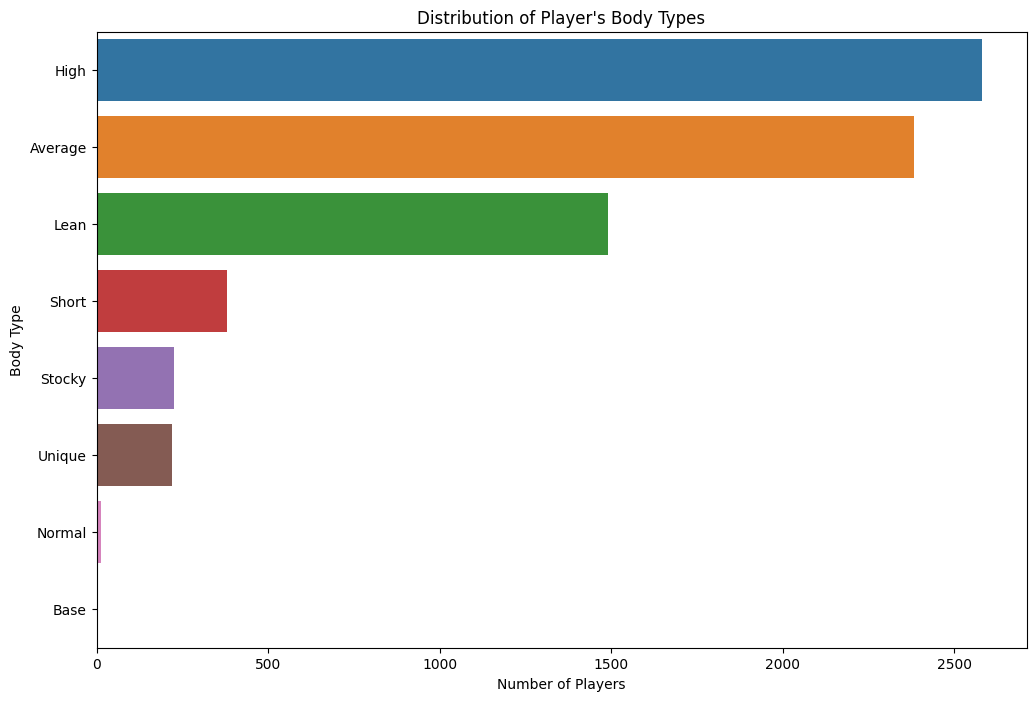

In [5]:
# Create a bar plot showing the counts of each body type
plt.figure(figsize=(12, 8))
bodytype_counts = players['BodyType'].value_counts()
sns.barplot(x=bodytype_counts.values, y=bodytype_counts.index)
plt.title('Distribution of Player\'s Body Types')
plt.xlabel('Number of Players')
plt.ylabel('Body Type')
plt.show()